## GPT-2 


In [1]:
from google.colab import drive
drive.mount("/content/drive")

%cd "/content/drive/My Drive/copy-brain"

Mounted at /content/drive
/content/drive/My Drive/copy-brain


In [2]:
! ls

 cached_lm_GPT2TokenizerFast_128_test.txt	 'run_language_modeling (1).py'
 cached_lm_GPT2TokenizerFast_128_test.txt.lock	  run_language_modeling.py
 cached_lm_GPT2TokenizerFast_128_train.txt	  runs
 cached_lm_GPT2TokenizerFast_128_train.txt.lock   test_dataset.txt
 copy-gpt2					  test.txt
'data-cleaning (1).ipynb'			  train_dataset.txt
 Dataset.txt					  train.txt
'GPT2 (1).ipynb'				  transformers
 run_clm.py					  val.txt
 run_generation.py


In [3]:
!pip install transformers==4.2.2

     |████████████████████████████████| 1.8 MB 5.3 MB/s 
     |████████████████████████████████| 2.9 MB 41.0 MB/s 
     |████████████████████████████████| 880 kB 38.4 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=2e343a22431e8aa272bd012e8868e6a6ea04887c10457a4d3a314d495846e812
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [4]:
import numpy as np

In [5]:
import re
import json
from sklearn.model_selection import train_test_split


with open('Dataset.txt') as f:
    data = f.readlines()

train, test = train_test_split(data,test_size=0.15, shuffle=False) 


with open("train.txt", "w") as f:
  f.writelines(train)

with open("test.txt", "w") as f:
  f.writelines(test)

print("Train dataset length: "+str(len(train)))
print("Test dataset length: "+ str(len(test)))

Train dataset length: 698
Test dataset length: 124


# LET'S FINE TUNE GPT-2

In [6]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")

train_path = 'train.txt'
test_path = 'test.txt'

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [7]:
from transformers import TextDataset,DataCollatorForLanguageModeling

def load_dataset(train_path,test_path,tokenizer):
    train_dataset = TextDataset(
          tokenizer=tokenizer,
          file_path=train_path,
          block_size=128)
     
    test_dataset = TextDataset(
          tokenizer=tokenizer,
          file_path=test_path,
          block_size=128)   
    
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=False,
    )
    return train_dataset,test_dataset,data_collator

train_dataset,test_dataset,data_collator = load_dataset(train_path,test_path,tokenizer)

/usr/local/lib/python3.7/dist-packages/transformers/data/datasets/language_modeling.py:58: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/master/examples/language-modeling/run_mlm.py
  FutureWarning,


In [8]:
from transformers import Trainer, TrainingArguments,AutoModelWithLMHead

model = AutoModelWithLMHead.from_pretrained("gpt2")


training_args = TrainingArguments(
    output_dir="./copy-gpt2", #The output directory
    overwrite_output_dir=True, #overwrite the content of the output directory
    num_train_epochs=3, # number of training epochs
    per_device_train_batch_size=32, # batch size for training
    per_device_eval_batch_size=64,  # batch size for evaluation
    eval_steps = 400, # Number of update steps between two evaluations.
    save_steps=800, # after # steps model is saved 
    warmup_steps=500,# number of warmup steps for learning rate scheduler
    prediction_loss_only=True,
    )


trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:925: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

In [9]:
trainer.train()

Step,Training Loss


TrainOutput(global_step=12, training_loss=3.1218315760294595, metrics={'train_runtime': 24.5709, 'train_samples_per_second': 0.488, 'total_flos': 29531059716096, 'epoch': 3.0})

In [10]:
trainer.save_model()

In [11]:
from transformers import pipeline

model = pipeline('text-generation',model='./copy-gpt2', tokenizer='gpt2',config={'max_length':800})



In [20]:
result = model('''Write an Ad for a fairness cream called Faiza Beauty Cream
****
Faiza Beauty Cream is''')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [21]:
result

[{'generated_text': 'Write an Ad for a fairness cream called Faiza Beauty Cream\n****\nFaiza Beauty Cream is a premium powder that was made using 100% Pure Vegetable Organic Powdered Mineral Cream. It is naturally rich and natural. It has little to'}]

In [ ]:
!export N=gpu_num
!export CUDA_VISIBLE_DEVICES=$N 

In [ ]:
# --evaluate_during_training \

In [ ]:
! pip install datasets

     |████████████████████████████████| 342 kB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 70.3 MB/s 
     |████████████████████████████████| 136 kB 77.2 MB/s 
     |████████████████████████████████| 212 kB 75.3 MB/s 
     |████████████████████████████████| 127 kB 77.5 MB/s 
     |████████████████████████████████| 271 kB 77.9 MB/s 
     |████████████████████████████████| 144 kB 72.7 MB/s 
     |████████████████████████████████| 94 kB 4.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
! git clone https://github.com/huggingface/transformers

Cloning into 'transformers'...
remote: Enumerating objects: 95439, done.
remote: Counting objects: 100% (264/264), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 95439 (delta 109), reused 132 (delta 46), pack-reused 95175
Receiving objects: 100% (95439/95439), 88.56 MiB | 9.48 MiB/s, done.
Resolving deltas: 100% (70103/70103), done.
Checking out files: 100% (2192/2192), done.


In [ ]:
!cp transformers/examples/pytorch/language-modeling/run_clm.py .

In [ ]:
! python run_clm.py \
--output_dir=copy-brain \
--model_type=gpt2 \
--model_name_or_path=gpt2 \
--do_train \
--train_data_file=train.txt \
--do_eval \
--eval_data_file=val.txt \
--per_device_train_batch_size=4 \
--per_device_eval_batch_size=4 \
--line_by_line \
--learning_rate 5e-5 \
--num_train_epochs=1 

Traceback (most recent call last):
  File "run_clm.py", line 575, in <module>
    main()
  File "run_clm.py", line 215, in main
    model_args, data_args, training_args = parser.parse_args_into_dataclasses()
  File "/usr/local/lib/python3.7/dist-packages/transformers/hf_argparser.py", line 214, in parse_args_into_dataclasses
    obj = dtype(**inputs)
  File "<string>", line 14, in __init__
  File "run_clm.py", line 194, in __post_init__
    raise ValueError("Need either a dataset name or a training/validation file.")
ValueError: Need either a dataset name or a training/validation file.


In [ ]:
! python run_language_modeling.py \
--output_dir=copy-brain \
--model_type=gpt2 \
--model_name_or_path=gpt2 \
--do_train \
--train_data_file=train.txt \
--do_eval \
--eval_data_file=val.txt \
--per_device_train_batch_size=4 \
--per_device_eval_batch_size=4 \
--line_by_line \
--learning_rate 5e-5 \
--num_train_epochs=1 

05/16/2022 23:00:15 - WARNING - __main__ - Process rank: -1, device: cuda:0, n_gpu: 1, distributed training: False, 16-bits training: False
05/16/2022 23:00:15 - INFO - __main__ - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=IntervalStrategy.NO,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_min_num_params=0,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id

In [ ]:
!export K=k_for_top_k_sampling_decoder
!export CUDA_VISIBLE_DEVICES=$N 

In [ ]:
! python run_generation.py \
--model_type gpt2 \
--model_name_or_path rumi-gpt2 \
--length 30 \
--prompt "<BOS>" \
--stop_token "<EOS>" \
--num_return_sequences 5

2020-09-27 16:43:11.614889: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
09/27/2020 16:43:13 - WARNING - __main__ -   device: cuda, n_gpu: 1, 16-bits training: False
09/27/2020 16:43:22 - INFO - __main__ -   Namespace(device=device(type='cuda'), fp16=False, k=0, length=30, model_name_or_path='rumi-gpt2', model_type='gpt2', n_gpu=1, no_cuda=False, num_return_sequences=5, p=0.9, padding_text='', prefix='', prompt='<BOS>', repetition_penalty=1.0, seed=42, stop_token='<EOS>', temperature=1.0, xlm_language='')
Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence
=== GENERATED SEQUENCE 1 ===
<BOS>  for the station that everyone wants to go. It's the secret, the quest, not the act of the belly up all night, and the pre
=== GENERATED SEQUENCE 2 ===
<BOS>  with you. He has been accustomed to the ocean." We live with the sun in this state. I see it too. The sun that's com
=== GENERATED SEQUENCE 3 ===


In [ ]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("german-neg3", from_pt=True)
# add the EOS token as PAD token to avoid warnings
model = TFGPT2LMHeadModel.from_pretrained("german-neg3", pad_token_id=tokenizer.eos_token_id, from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFGPT2LMHeadModel: ['transformer.h.8.attn.masked_bias', 'transformer.h.9.attn.masked_bias', 'transformer.h.6.attn.masked_bias', 'transformer.h.10.attn.masked_bias', 'transformer.h.10.attn.bias', 'transformer.h.1.attn.bias', 'transformer.h.5.attn.bias', 'transformer.h.2.attn.bias', 'transformer.h.1.attn.masked_bias', 'transformer.h.6.attn.bias', 'transformer.h.9.attn.bias', 'transformer.h.4.attn.masked_bias', 'transformer.h.5.attn.masked_bias', 'transformer.h.4.attn.bias', 'lm_head.weight', 'transformer.h.0.attn.bias', 'transformer.h.2.attn.masked_bias', 'transformer.h.8.attn.bias', 'transformer.h.3.attn.bias', 'transformer.h.11.attn.bias', 'transformer.h.0.attn.masked_bias', 'transformer.h.7.attn.masked_bias', 'transformer.h.7.attn.bias', 'transformer.h.11.attn.masked_bias', 'transformer.h.3.attn.masked_bias']
- This IS expected if you are initializing TFGPT2LMHeadModel from a PyTorch model trained on an

In [ ]:
all_input_ids = []
with open("negative_tweets.csv") as file:
    lines = file.readlines()

lines = [" ".join(line.split()[0:2]) for line in lines]
# encode context the generation is conditioned on
for line in lines:
    if line != "":
        all_input_ids.append(tokenizer.encode(line, return_tensors='tf'))


In [ ]:
t = [x.numpy() for x in all_input_ids]

In [ ]:
t = [t.size for t in t]

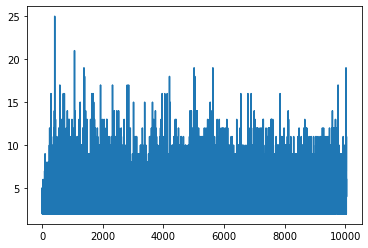

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.array(t))

In [ ]:
from tqdm.notebook import tqdm
import numpy as np
seed = 2
tf.random.set_seed(seed)

MAX=len(lines)

final_outputs = []
i=0
for input_id in tqdm(all_input_ids[:MAX]):
    # set top_k = 50 and set top_p = 0.95 and num_return_sequences = 3
    output = model.generate(
        input_id,
        do_sample=True, 
        # max_length=50, 
        max_length=np.random.randint(26,30),
        num_beams=3, 
        no_repeat_ngram_size=2, 
        early_stopping=True
    )
    final_outputs.append(tokenizer.decode(output[0], skip_special_tokens=True)+"\n")
    if i%100==0:
        # print(i,"Tweets Generated!\n")
        with open(f"neg-checkpoints/negatives-seed{seed}-checkpoints-{i}.txt", "w") as f:
            f.writelines(final_outputs)
        final_outputs=[]
    i+=1

In [ ]:
final_outputs

# FOR POSITVE TWEETS

In [ ]:
!export N=gpu_num
!export CUDA_VISIBLE_DEVICES=$N 

In [ ]:
! python run_language_modeling.py \
--output_dir=german-pos3 \
--model_type=gpt2 \
--model_name_or_path=anonymous-german-nlp/german-gpt2 \
--do_train \
--train_data_file=pos-train.txt \
--do_eval \
--eval_data_file=pos-val.txt \
--per_device_train_batch_size=8 \
--per_device_eval_batch_size=8 \
--line_by_line \
--evaluate_during_training \
--learning_rate 5e-5 \
--num_train_epochs=10 \
--save_steps=-1 \

2020-09-27 05:54:32.305976: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
/usr/local/lib/python3.6/dist-packages/transformers/training_args.py:299: FutureWarning: The `evaluate_during_training` argument is deprecated in favor of `evaluation_strategy` (which has more options)
  FutureWarning,
Traceback (most recent call last):
  File "run_language_modeling.py", line 316, in <module>
    main()
  File "run_language_modeling.py", line 168, in main
    f"Output directory ({training_args.output_dir}) already exists and is not empty. Use --overwrite_output_dir to overcome."
ValueError: Output directory (german-pos3) already exists and is not empty. Use --overwrite_output_dir to overcome.


In [ ]:
!export K=k_for_top_k_sampling_decoder
!export CUDA_VISIBLE_DEVICES=$N 

In [ ]:
! python run_generation.py \
--model_type gpt2 \
--model_name_or_path german-pos3 \
--length 25 \
--prompt "<BOS>" \
--stop_token "<EOS>" \
--num_return_sequences 10

2020-09-27 05:54:46.822257: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
09/27/2020 05:54:48 - WARNING - __main__ -   device: cuda, n_gpu: 1, 16-bits training: False
09/27/2020 05:55:00 - INFO - __main__ -   Namespace(device=device(type='cuda'), fp16=False, k=0, length=25, model_name_or_path='german-pos3', model_type='gpt2', n_gpu=1, no_cuda=False, num_return_sequences=10, p=0.9, padding_text='', prefix='', prompt='<BOS>', repetition_penalty=1.0, seed=42, stop_token='<EOS>', temperature=1.0, xlm_language='')
Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence
=== GENERATED SEQUENCE 1 ===
<BOS>  feinesDing :-) auf mail hinweisen und freundlich bitten dich, bei dir an der vorbeigehenden Reparatur zu helfen
=== GENERATED SEQUENCE 2 ===
<BOS>  wierd ick hoffe ist nichts ernstes dran. Aber frohe Ostern und ein paar feine Ramen. 
=== GENERATED SEQUENCE 3 ===
<BOS> ver, ich war's nicht. ;) Wird wo

In [ ]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("german-pos3", from_pt=True)
# add the EOS token as PAD token to avoid warnings
model = TFGPT2LMHeadModel.from_pretrained("german-pos3", pad_token_id=tokenizer.eos_token_id, from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFGPT2LMHeadModel: ['transformer.h.0.attn.masked_bias', 'transformer.h.5.attn.bias', 'transformer.h.3.attn.bias', 'transformer.h.4.attn.bias', 'transformer.h.2.attn.bias', 'transformer.h.0.attn.bias', 'transformer.h.2.attn.masked_bias', 'transformer.h.6.attn.masked_bias', 'transformer.h.10.attn.bias', 'transformer.h.7.attn.masked_bias', 'transformer.h.1.attn.masked_bias', 'transformer.h.11.attn.bias', 'lm_head.weight', 'transformer.h.10.attn.masked_bias', 'transformer.h.5.attn.masked_bias', 'transformer.h.8.attn.masked_bias', 'transformer.h.7.attn.bias', 'transformer.h.9.attn.bias', 'transformer.h.9.attn.masked_bias', 'transformer.h.8.attn.bias', 'transformer.h.6.attn.bias', 'transformer.h.3.attn.masked_bias', 'transformer.h.1.attn.bias', 'transformer.h.4.attn.masked_bias', 'transformer.h.11.attn.masked_bias']
- This IS expected if you are initializing TFGPT2LMHeadModel from a PyTorch model trained on an

In [ ]:
all_input_ids = []
with open("Mappe1.csv") as file:
    lines = file.readlines()

lines = [" ".join(line.split()[0:2]) for line in lines]
# encode context the generation is conditioned on
for line in lines:
    if line != "":
        all_input_ids.append(tokenizer.encode(line, return_tensors='tf'))


In [ ]:
t = [x.numpy() for x in all_input_ids]

In [ ]:
t = [t.size for t in t]

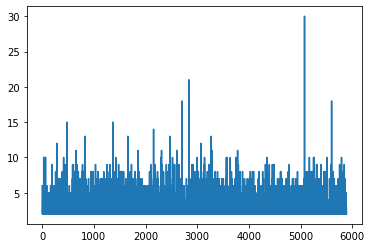

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.array(t))

In [ ]:

from tqdm.notebook import tqdm
import numpy as np
seed = 2
tf.random.set_seed(seed)

MAX=len(lines)

final_outputs = []
i=0
for input_id in tqdm(all_input_ids[:MAX]):
    # set top_k = 50 and set top_p = 0.95 and num_return_sequences = 3
    output = model.generate(
        input_id,
        do_sample=True, 
        # max_length=50, 
        max_length=np.random.randint(20,32),
        num_beams=3, 
        no_repeat_ngram_size=2, 
        early_stopping=True
    )
    final_outputs.append(tokenizer.decode(output[0], skip_special_tokens=True)+"\n")
    if i%100==0:
        # print(i,"Tweets Generated!\n")
        with open(f"pos-checkpoints/positives-seed{seed}-checkpoints3-{i}.txt", "w") as f:
            f.writelines(final_outputs)
        final_outputs=[]
    i+=1

AssertionError: ignored